<img src="ku_logo_uk_v.png" alt="drawing" width="500" style="float:right"/>


# Welcome to Workshop 9 - Introduction to Programming and Numerical Analysis !!!

# Plan for today
- Algorithms
- Problem set 5 or Data Project


# Algorithms are 
- A finite sequence of well-defined instructions

## Sounds like a recipe in common English.
### We use algorithms for
- Baking a cake
- Caculating the square of 2 
- Finding the local minimum in a function.



# How they work
## Bubble sort
- Repeatedly steps through a list of elements
- Compares adjacent elements and swaps them if they are in the wrong order
- Returns list in specified order

<img src="bubble.gif" style="float:">


# Another example - Intersect
- Compares one collection to anoter by checking if each element also exist or, are smaller/larger, in the other collection.

<img src="intersect.gif" style="float:">


# Ok fine, here is a coded example
## Newton's Method
### Root-finding algorithm
- Start with an initial guess.
- Approximate the function by its tangent line.
- Compute the x-intercept of this tangent line. 
- This x-intercept will typically be a better approximation to the original function's root.
- Iterate

The iterative procedure:

$$x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}$$

###  We use the Newton's Method to solve the equation below

$$f(x) = 3x^2 - exp(x)=0$$

$$f'(x) = g(x) = 6x-exp(x) $$

In [4]:
# import modules
import numpy as np
import matplotlib.pyplot as plt

# define equations for f and f'
f = lambda x: 3*x**2-np.exp(x)
g = lambda x: 6*x-np.exp(x)




In [9]:

def newton(f, g, x0, tol=10e-5, max_iter=100):
    '''
    Find root of a function using Newton's method
    '''
    #initialize the algorithm
    delta = 2000
    it=0 
    trials = []
    while (max_iter>= it and tol<delta):
        x1 =x0 - f(x0)/g(x0) # x_{n+1}
        delta = abs(x1-x0) # difference between xn and x_{n+1}
        it += 1 # count iterations
        x0 = x1 # new xn
        trials.append(x1)
    return x1, it, trials




In [42]:
#call the algorithm change x0 
x0,it, trials = newton(f = f, g = g, x0 = 0)
#grid
x = np.linspace(-2, 4, num=100)
print('Root of f(x):', round(x0,2))
print('Number of iterations to archieve convergence:', it)




Root of f(x): -0.46
Number of iterations to archieve convergence: 5


In [59]:
def plotting_function(x, y, x_label =None, y_label =None, title = None, label_size = None, title_size = None, show_zero = False, solution = None, iterations = []):
    '''
    A function that illustrates the process of an rootfinding algorithm
    Inputs
        x (list / numpy array): x values
        y (function): fucntion for the y values
        x_label (string): label for x-axis
        y_label (string): label for y-axis
        title (string): figure title
        label_size (int): size of y and x label
        title_size (int): size of the figure title
        show_zero (bool): option to display y = 0
        solution (float): display the solution to the problem
        iterations (list / np.array) list of algorithm iterations 

    '''
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6))
    # plot the function
    ax.plot(x, y)
    # plot solution
    if solution is not None:
        ax.scatter(solution, f(solution), color = 'black')
    #plot iterations
    ax.scatter(iterations,[f(i) for i in iterations], alpha = 0.5)

    if show_zero:
        ax.axhline(y=0, color='grey', linestyle=':', alpha= 0.6)

    # titles and labels    
    ax.set_xlabel(x_label, fontsize=label_size, fontweight='bold')
    ax.set_ylabel(y_label, fontsize=label_size, fontweight='bold')
    ax.set_title(title, fontsize=title_size, fontweight=title_size)

    # Remove the border around the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.show()

    

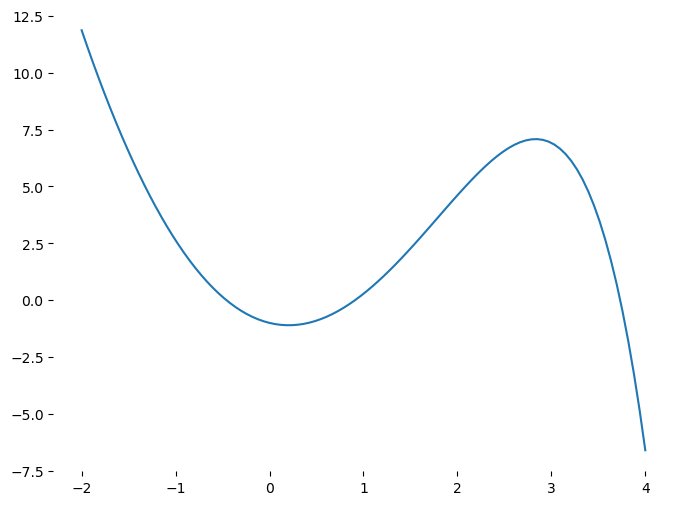

In [60]:
plotting_function(x,f(x))

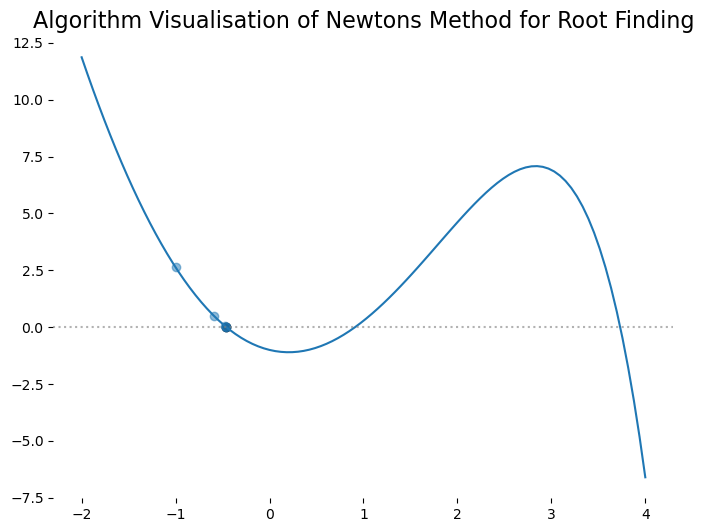

In [58]:
plotting_function(x,f(x), x_label = None, y_label =None, title = 'Algorithm Visualisation of Newtons Method for Root Finding', label_size = None, title_size = 16, show_zero = True, solution = x0, iterations = trials)